# <font size="+3" color=red ><b> <center><u>HR Analysis, Prediction and Visualization</u></center></b></font><br><a id="top"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hranalysis/test.csv
/kaggle/input/hranalysis/train.csv
/kaggle/input/imagehr/consulenza_marketing_vendita_slide20.jpg


## <font color='purple'> Loading the Dataset </font>

In [ ]:
############# Importing the datasets
train = pd.read_csv("/kaggle/input/hranalysis/train.csv")
test = pd.read_csv("/kaggle/input/hranalysis/test.csv")

In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
train.shape

(54808, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## <font color='purple'> Checking the Null Values </font>

In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

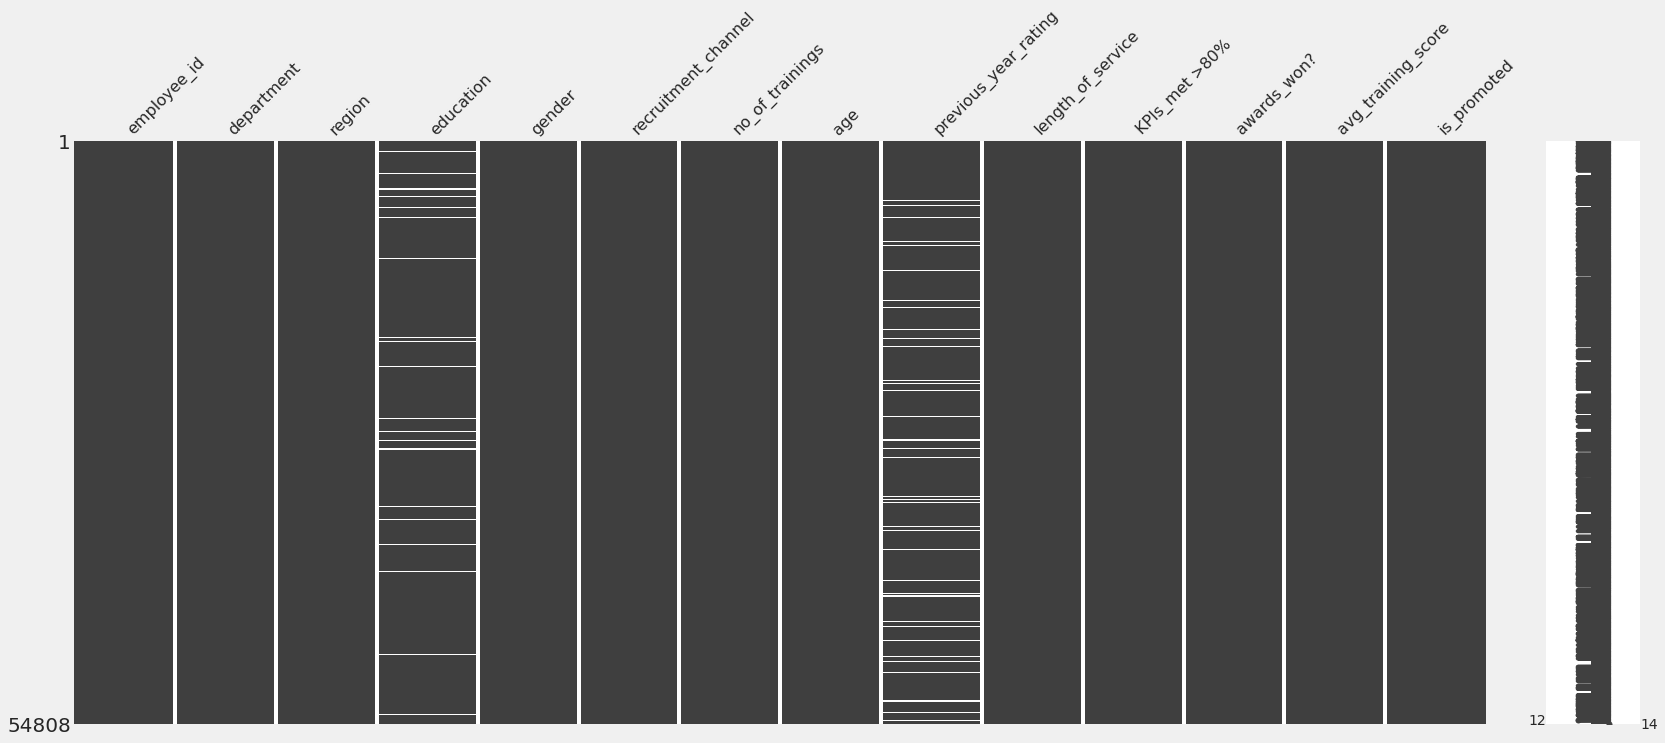

In [ ]:
#### Visualizing the null values using missingo function

import missingno as msno
msno.matrix(train)

In [ ]:
test.shape

(23490, 13)

In [ ]:
test.info() ### Check all information in the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

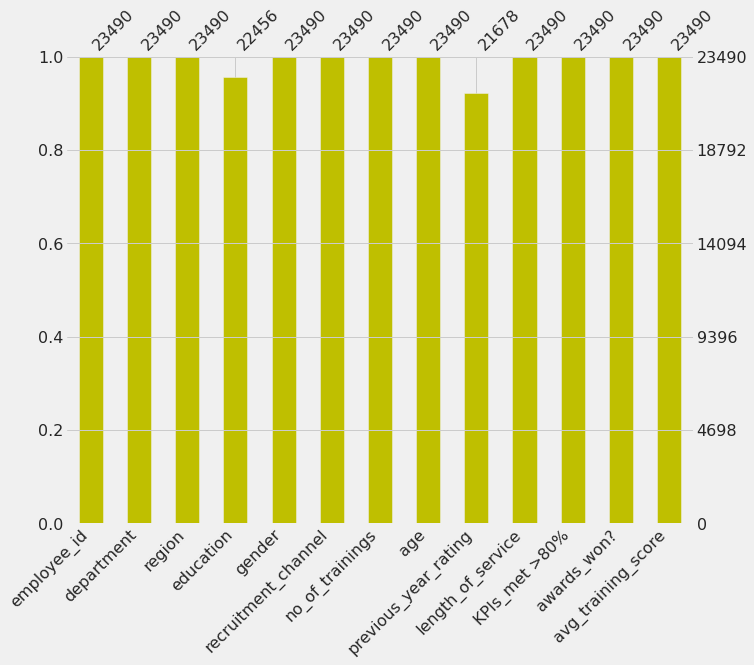

In [ ]:
msno.bar(test, color = 'y', figsize = (10,8))  #### Check the missing values in test data

## <font color='purple'> Exploratory Data Analysis </font>

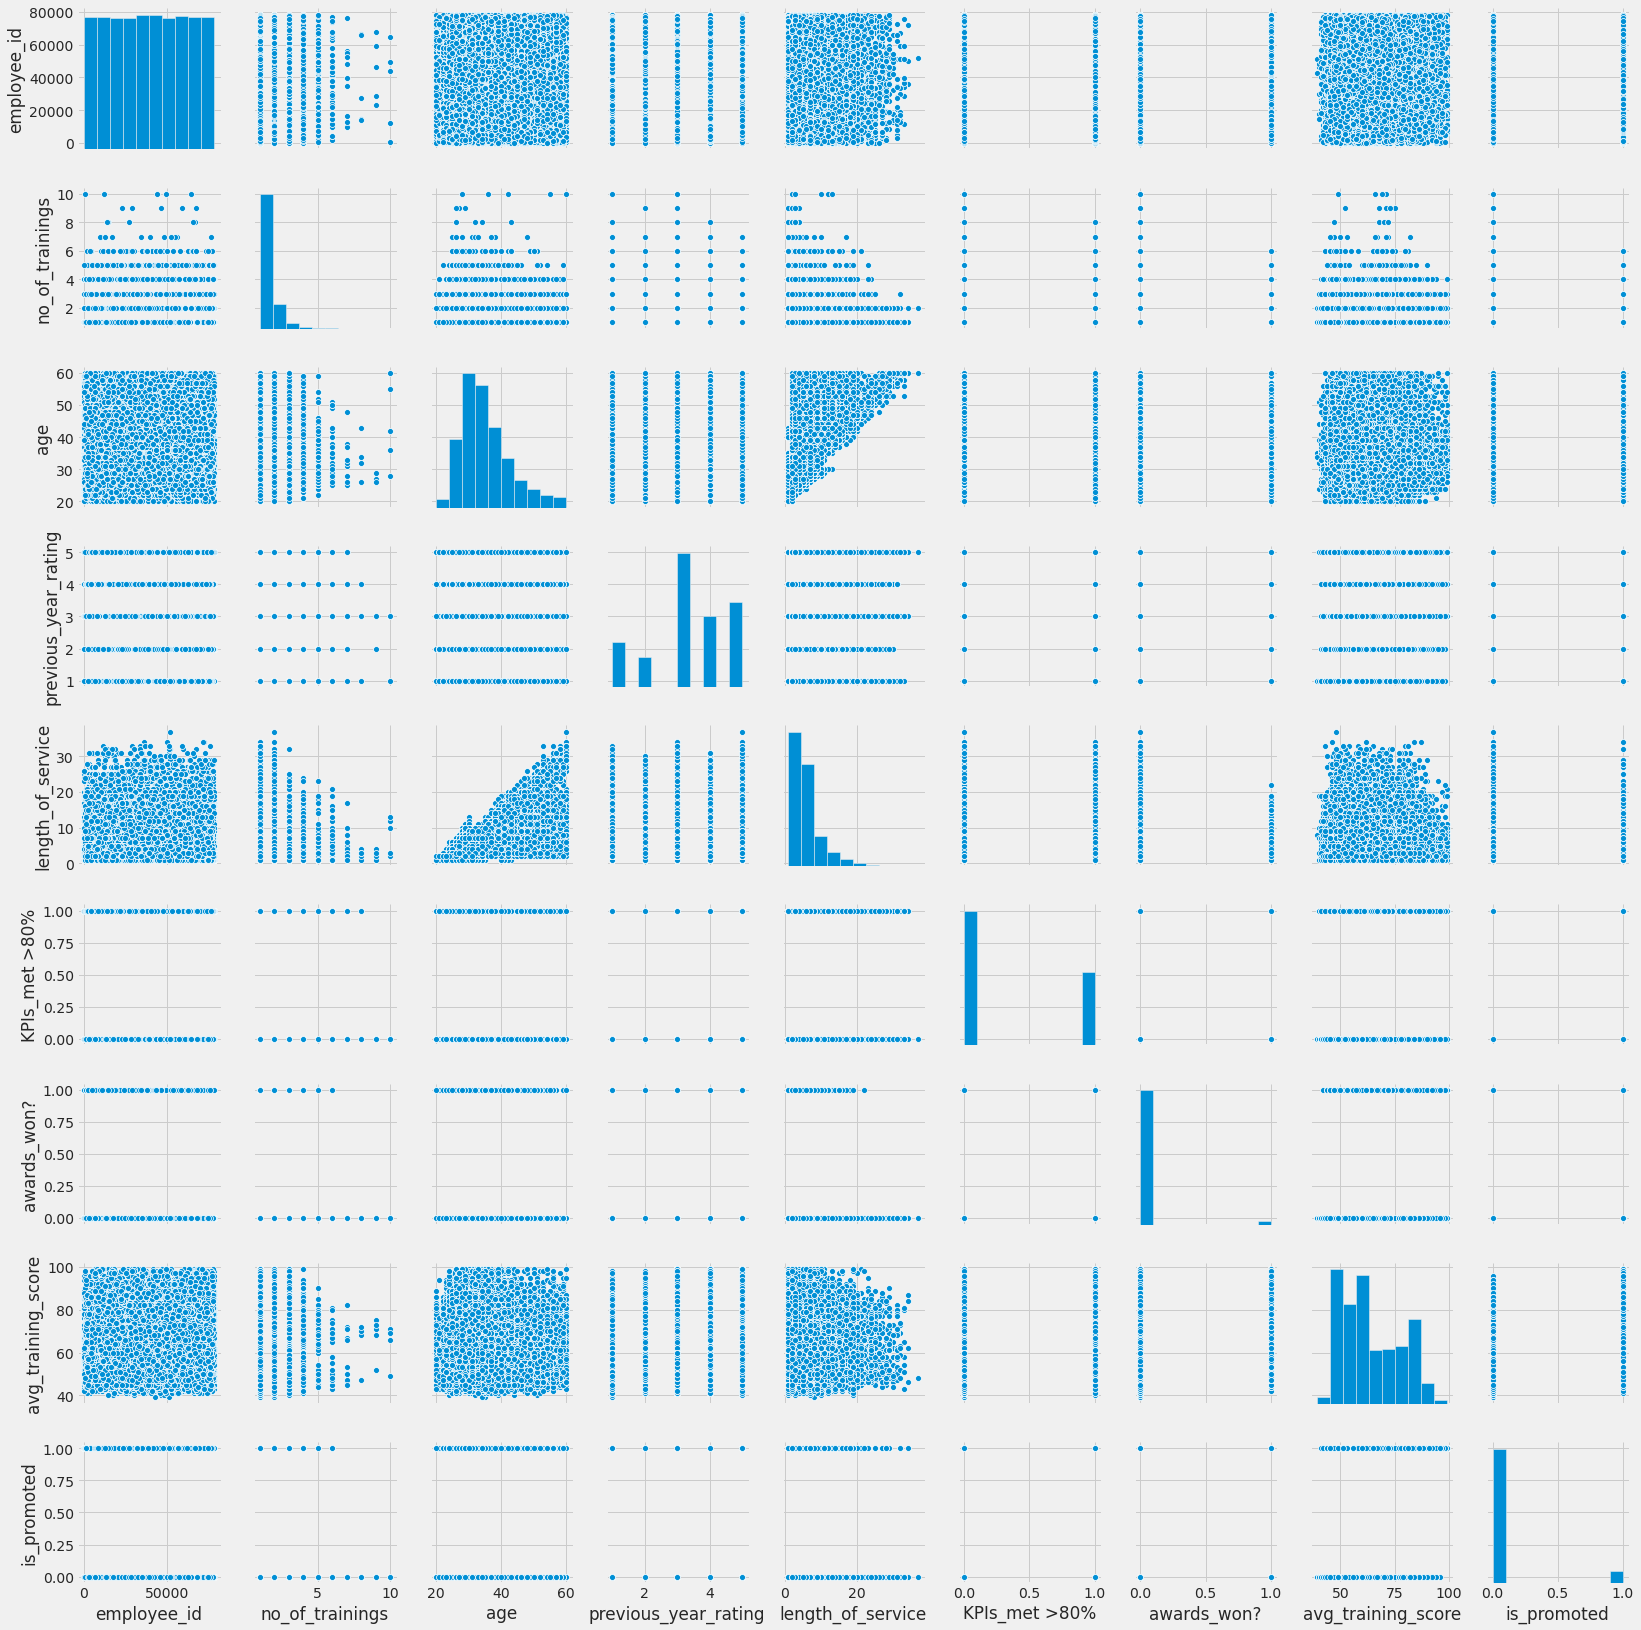

In [ ]:
### Pairplot using seaborn library
sns.pairplot(train)

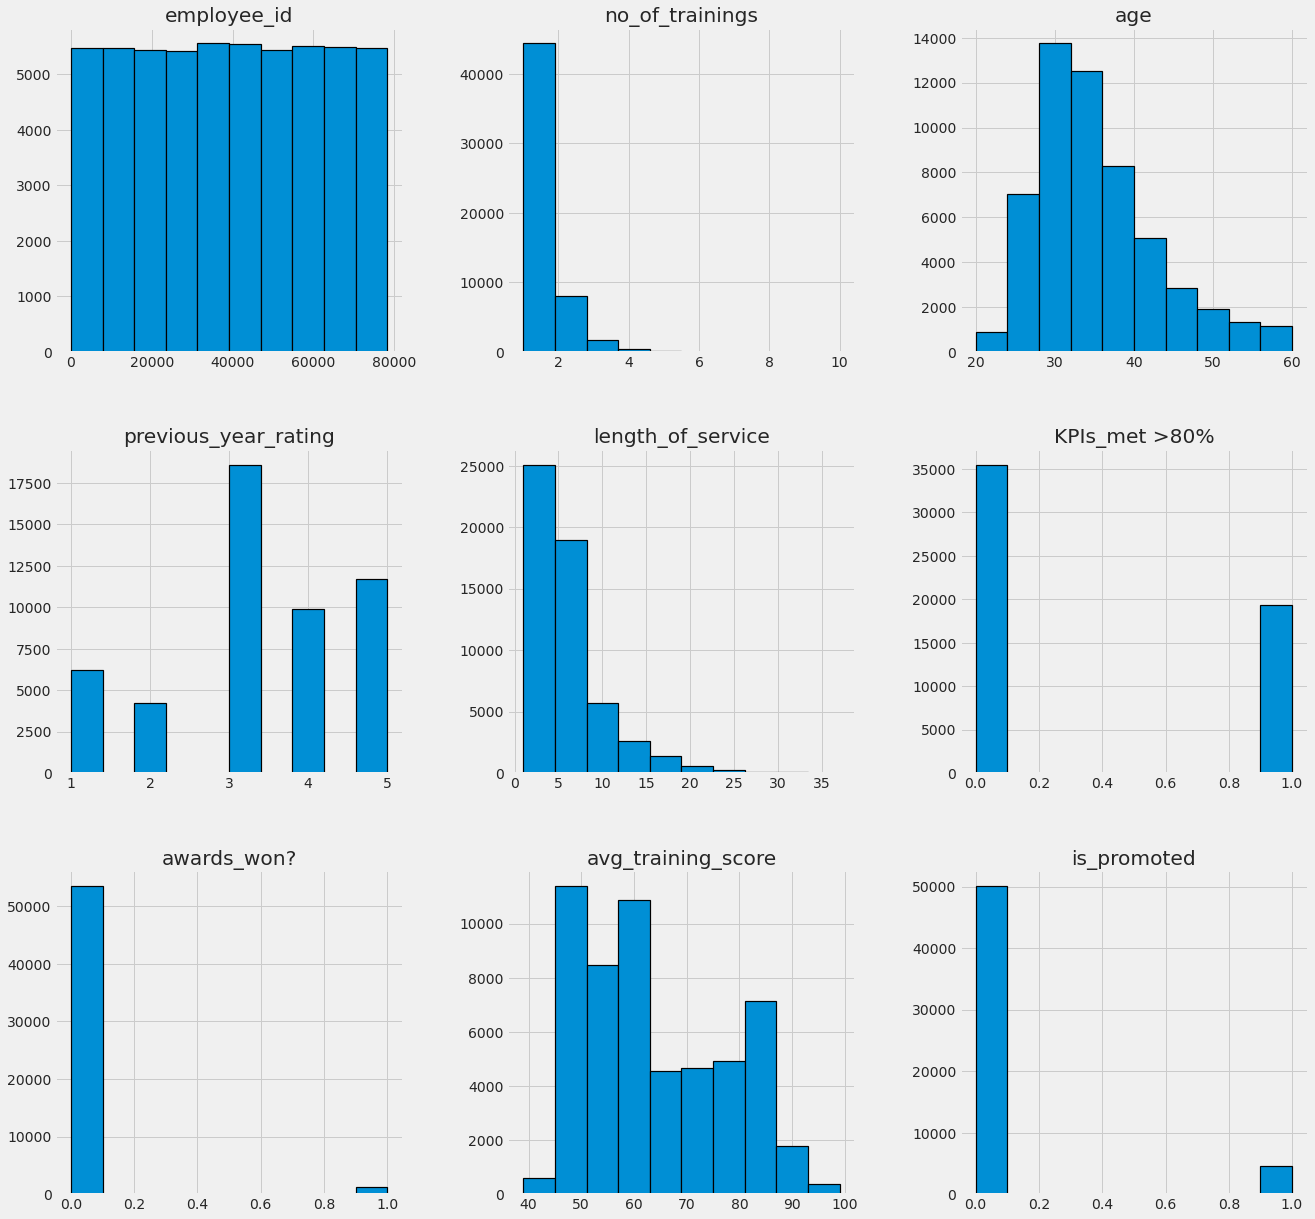

In [ ]:
# Visulazing the distibution of the data for every feature
train.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

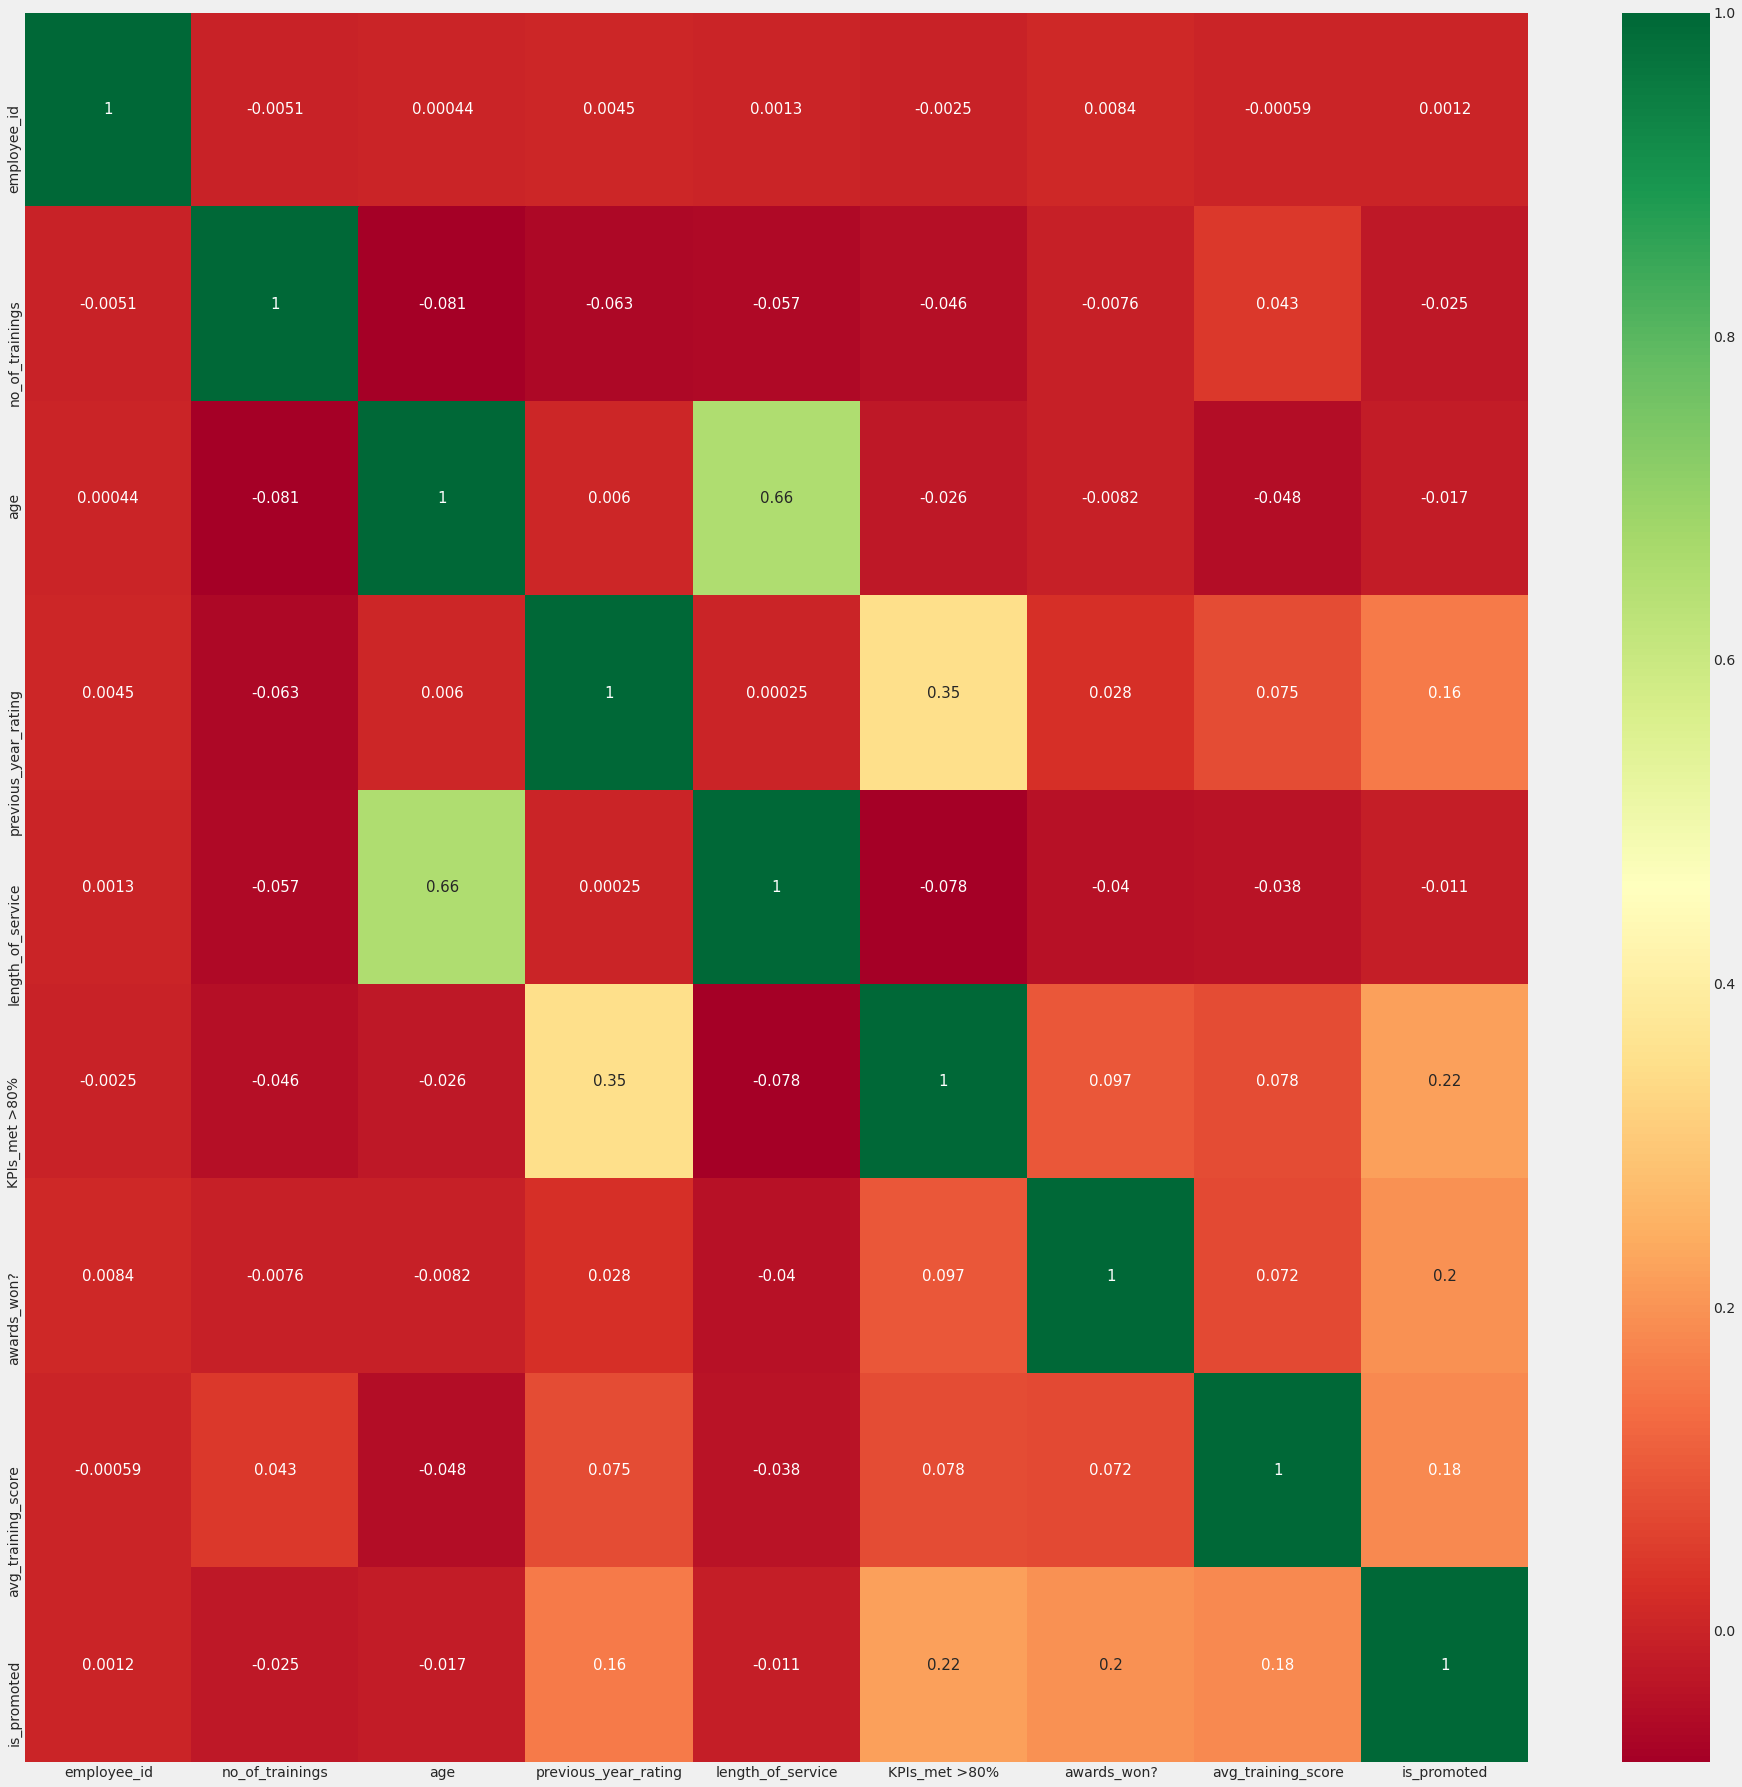

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [ ]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

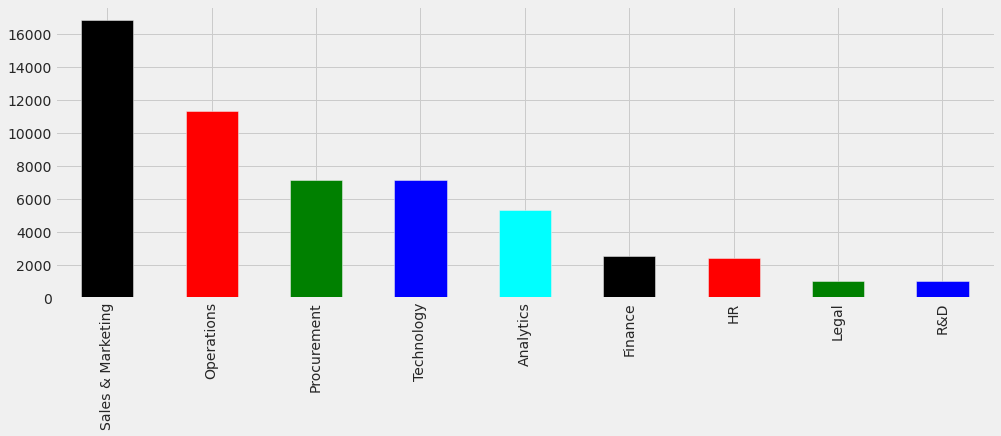

In [ ]:
# visualizing the different groups in the dataset
plt.subplots(figsize=(15,5))
train['department'].value_counts(normalize = True)
train['department'].value_counts(dropna = False).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

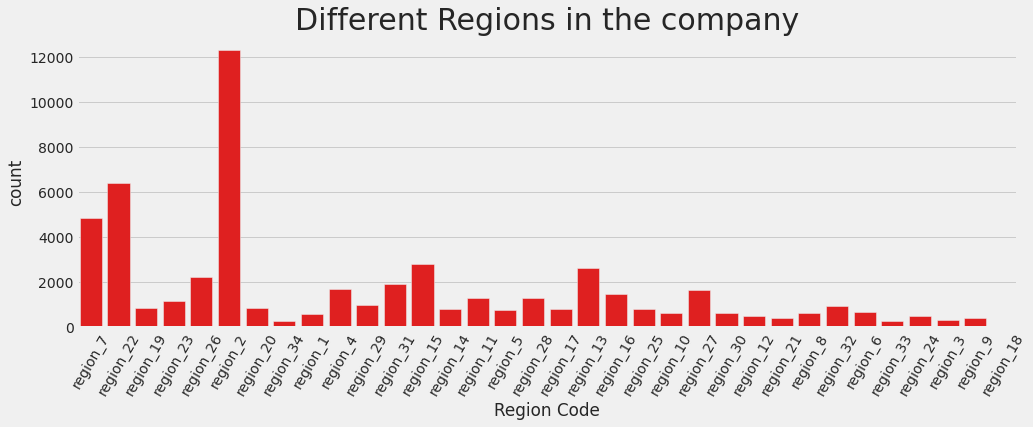

In [ ]:
# checking the different regions of the company
plt.subplots(figsize=(15,5))
sns.countplot(train['region'], color = 'red')
plt.title('Different Regions in the company', fontsize = 30)
plt.xticks(rotation = 60)
plt.xlabel('Region Code')
plt.ylabel('count')
plt.show()

In [ ]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

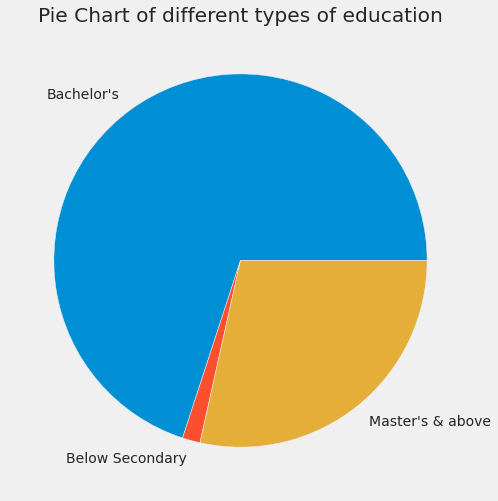

In [ ]:
# Prepare Data
df = train.groupby('education').size()

# Make the plot with pandas
df.plot(kind='pie', subplots=True, figsize=(15, 8))
plt.title("Pie Chart of different types of education")
plt.ylabel("")
plt.show()

In [ ]:
# checking the gender gap

train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

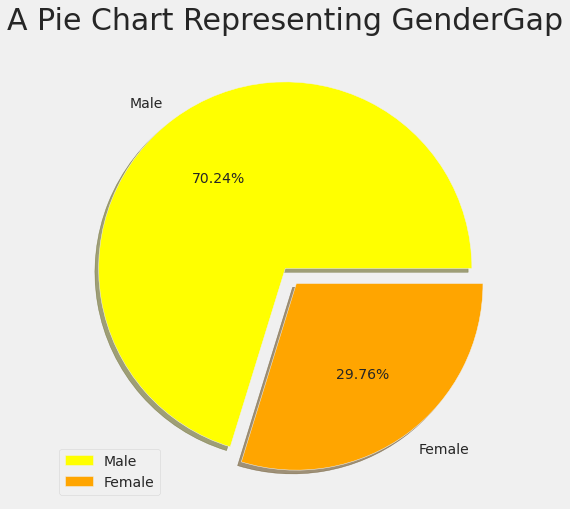

In [ ]:
# plotting a pie chart

size = [38496, 16312]
labels = "Male", "Female"
colors = ['yellow', 'orange']
explode = [0, 0.1]

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing GenderGap', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

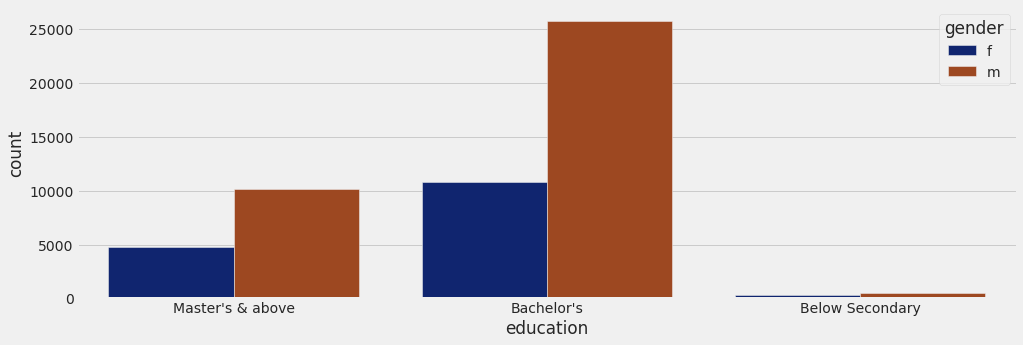

In [ ]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'education', data = train, hue = 'gender', palette = 'dark')
plt.show()

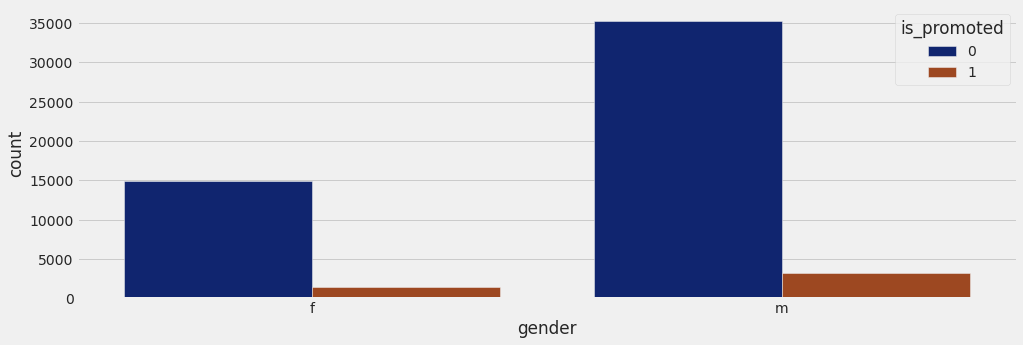

In [ ]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'gender', data = train, hue = 'is_promoted', palette = 'dark')
plt.show()

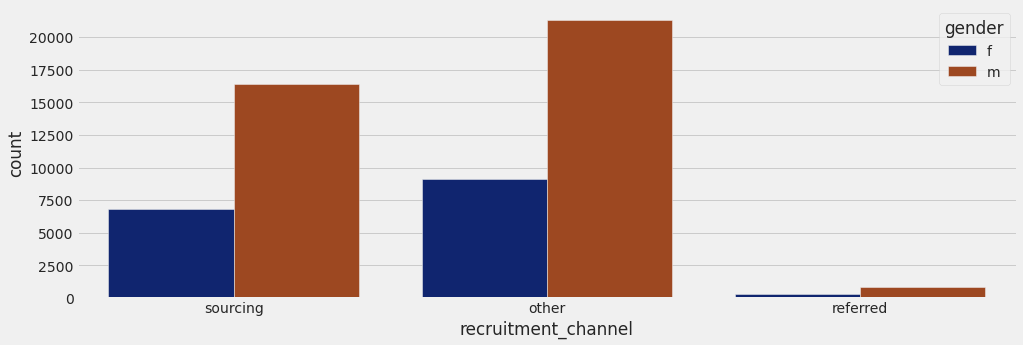

In [ ]:
# comparison of permoted gender male & female
plt.subplots(figsize=(15,5))
sns.countplot(x = 'recruitment_channel', data = train, hue = 'gender', palette = 'dark')
plt.show()

In [ ]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

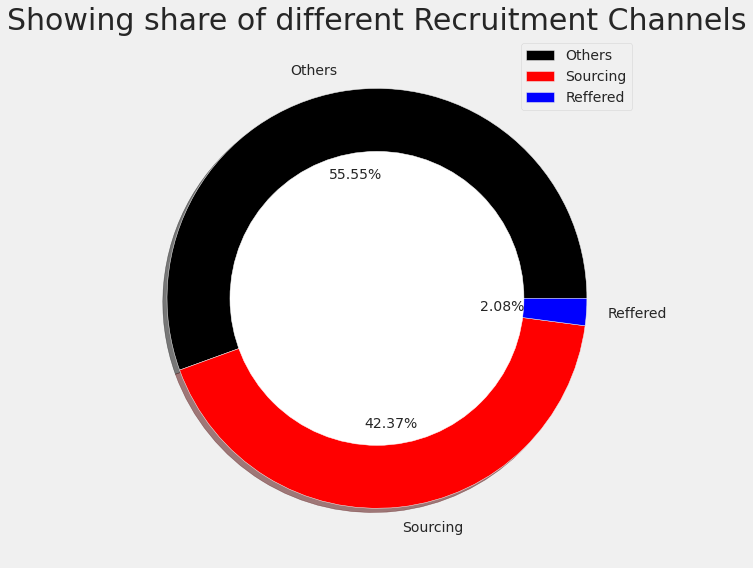

In [ ]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [30446, 23220, 1142]
colors = ['black', 'red', 'blue']
labels = "Others", "Sourcing", "Reffered"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Age of Employees')

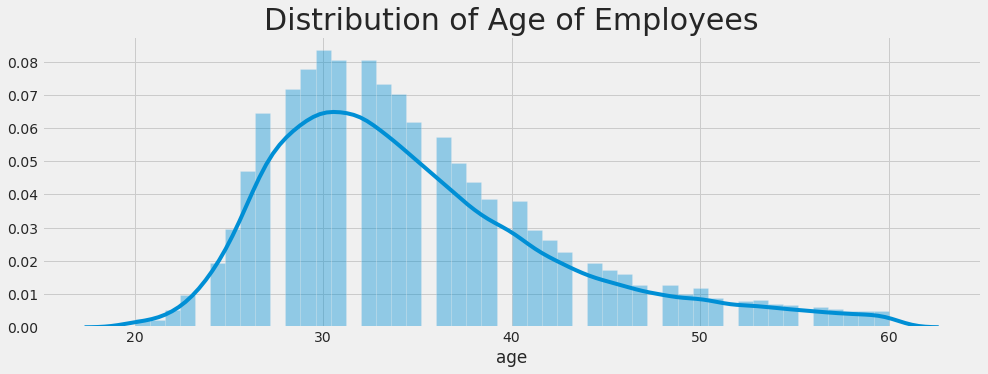

In [ ]:
plt.subplots(figsize=(15,5))
sns.distplot(train['age'])
plt.title('Distribution of Age of Employees', fontsize = 30)

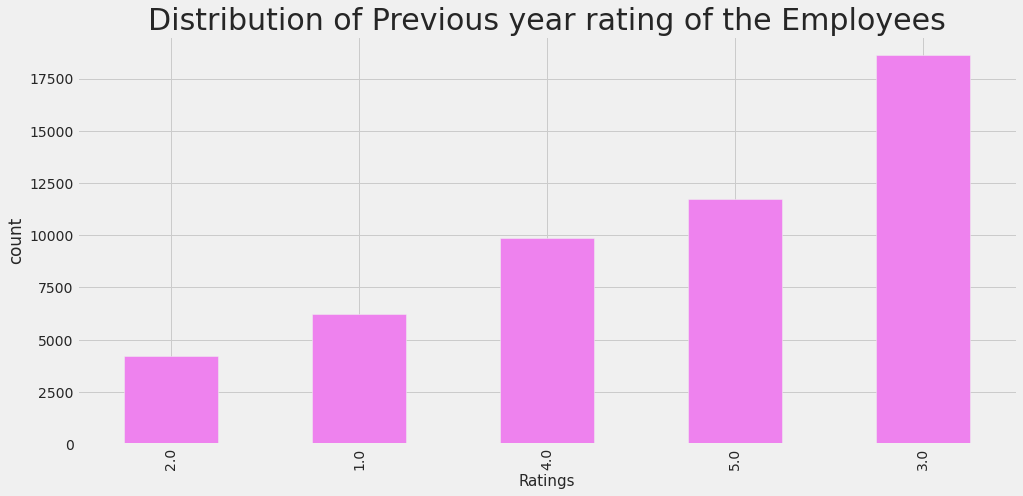

In [ ]:
train['previous_year_rating'].value_counts().sort_values().plot.bar(color = 'violet', figsize = (15, 7))
plt.title('Distribution of Previous year rating of the Employees', fontsize = 30)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

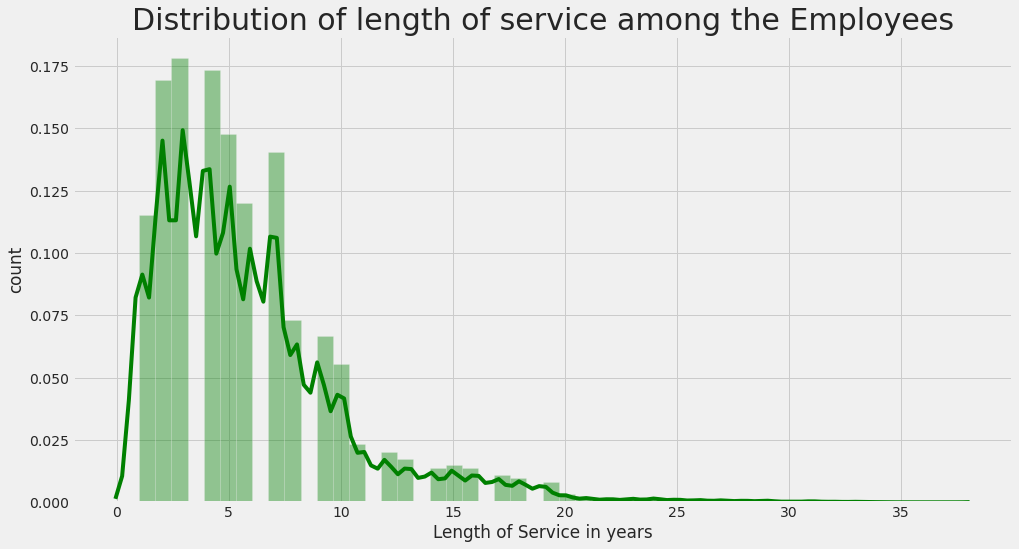

In [ ]:
# checking the distribution of length of service
plt.subplots(figsize=(15,8))
sns.distplot(train['length_of_service'], color = 'green')
plt.title('Distribution of length of service among the Employees', fontsize = 30)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()

In [ ]:
train['KPIs_met >80%'].value_counts()

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

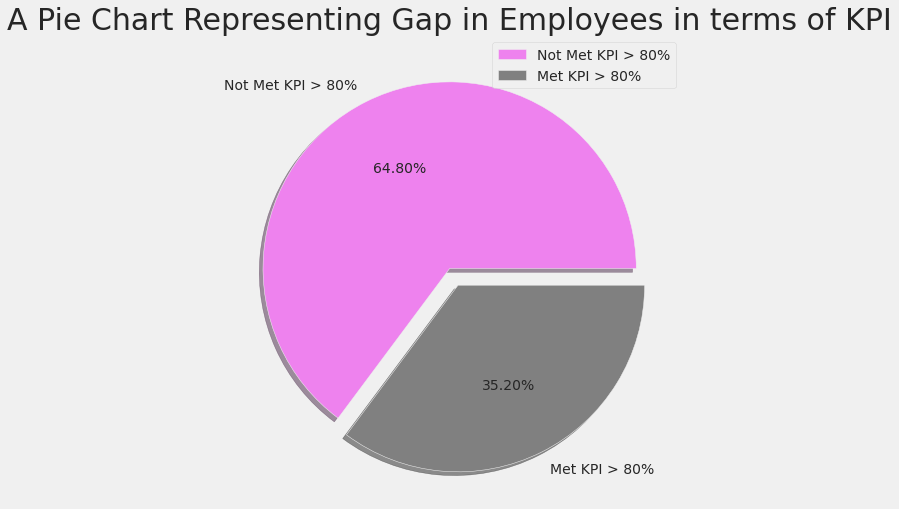

In [ ]:
# plotting a pie chart


size = [35517, 19291]
labels = "Not Met KPI > 80%", "Met KPI > 80%"
colors = ['violet', 'grey']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of KPI', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
train['awards_won?'].value_counts()

0    53538
1     1270
Name: awards_won?, dtype: int64

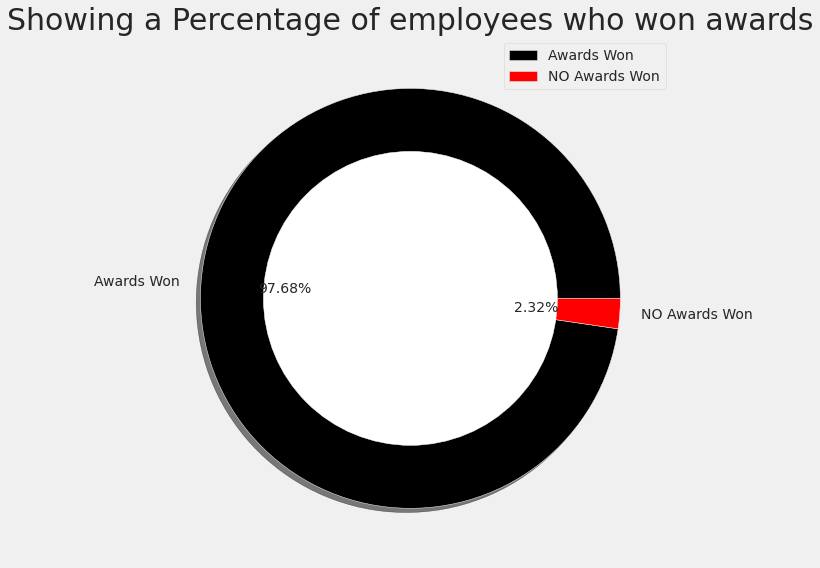

In [ ]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = [53538, 1270]
colors = ['black', 'red']
labels = "Awards Won", "NO Awards Won"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing a Percentage of employees who won awards', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

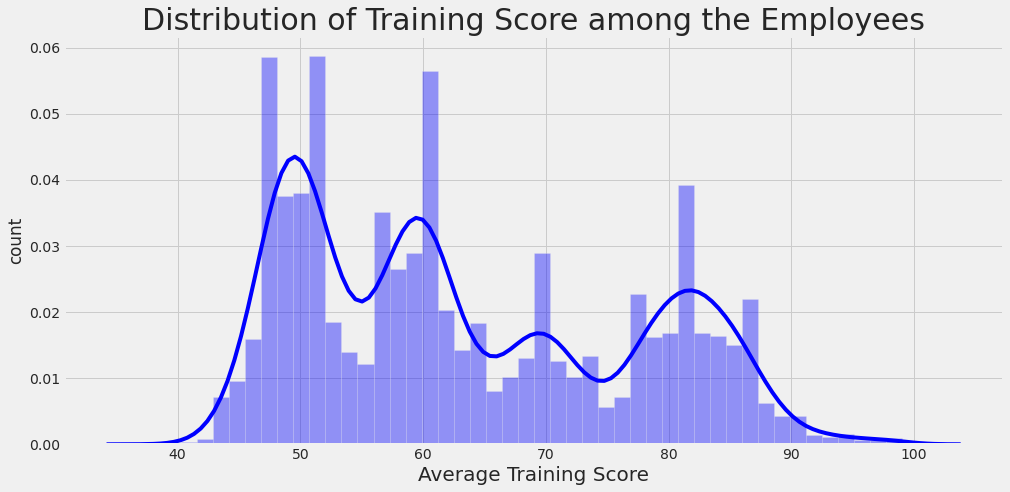

In [ ]:
# checking the distribution of the avg_training score of the Employees

plt.subplots(figsize=(15,7))
sns.distplot(train['avg_training_score'], color = 'blue')
plt.title('Distribution of Training Score among the Employees', fontsize = 30)
plt.xlabel('Average Training Score', fontsize = 20)
plt.ylabel('count')
plt.show()

In [ ]:
# checkig the no. of Employees Promoted

train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:

# finding the %age of people promoted

promoted = (4668/54808)*100
print("Percentage of Promoted Employees is {:.2f}%".format(promoted))

Percentage of Promoted Employees is 8.52%


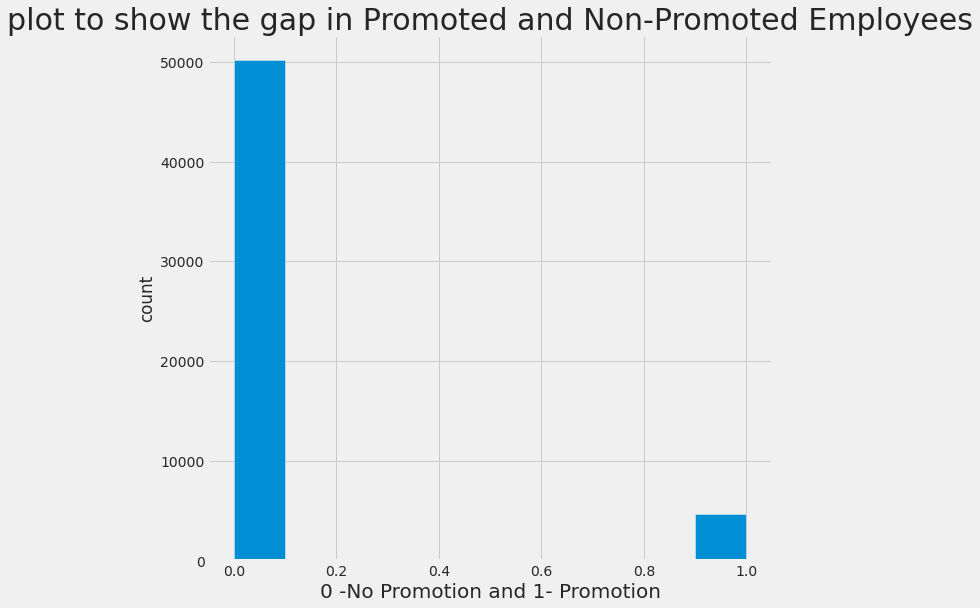

In [ ]:
#plotting a scatter plot

plt.hist(train['is_promoted'])
plt.title('plot to show the gap in Promoted and Non-Promoted Employees', fontsize = 30)
plt.xlabel('0 -No Promotion and 1- Promotion', fontsize = 20)
plt.ylabel('count')
plt.show()

### Bivariate

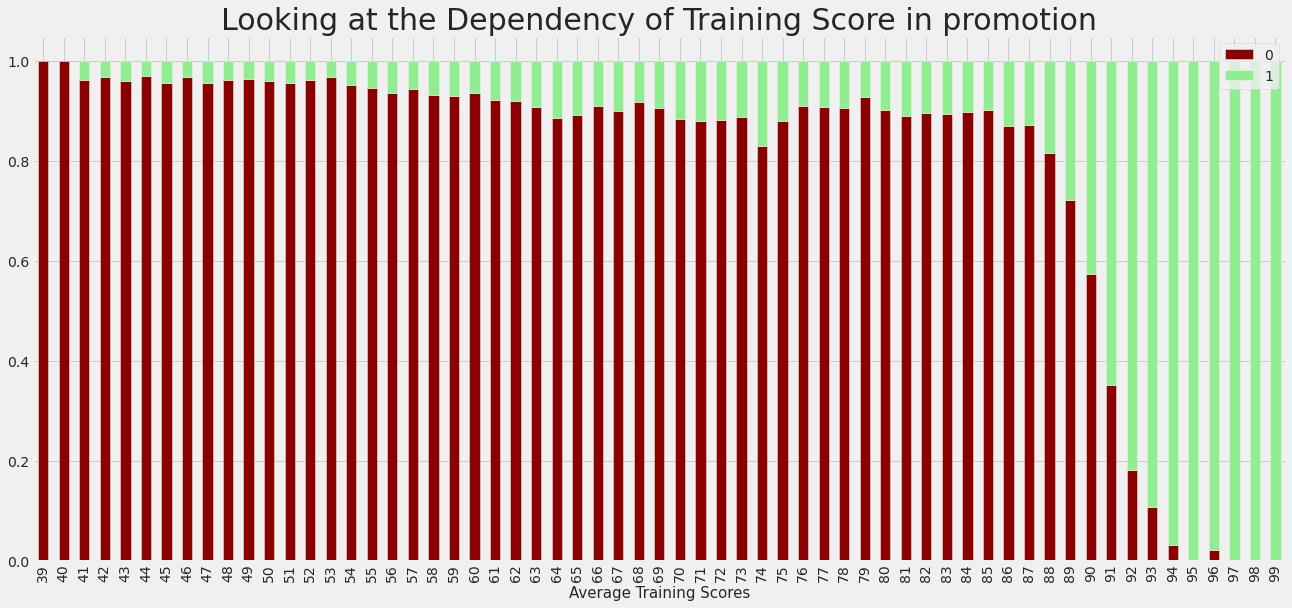

In [ ]:
# scatter plot between average training score and is_promoted

data = pd.crosstab(train['avg_training_score'], train['is_promoted'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Looking at the Dependency of Training Score in promotion', fontsize = 30)
plt.xlabel('Average Training Scores', fontsize = 15)
plt.legend()
plt.show()

##### As, the Training Scores Increases, the chances of Promotion Increases Highly

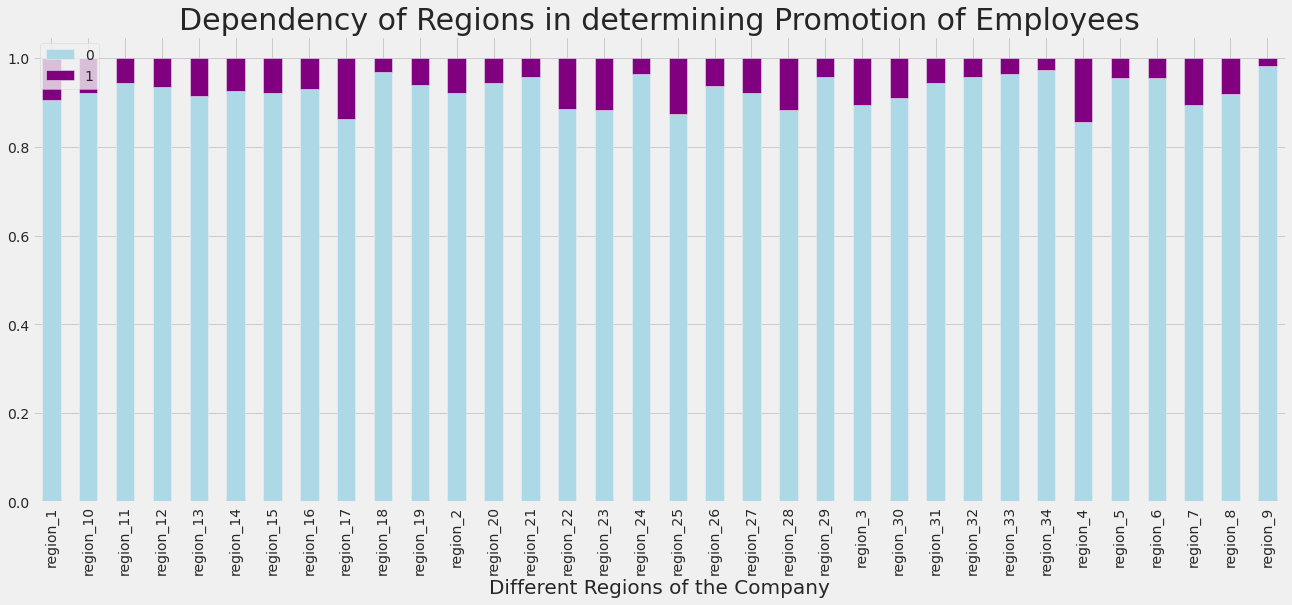

In [ ]:
# checking dependency of different regions in promotion

data = pd.crosstab(train['region'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'purple'])

plt.title('Dependency of Regions in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Regions of the Company', fontsize = 20)
plt.legend()
plt.show()

### The above graph shows that there is no biasedness over regions in terms of Promotion as all the regions share promotions almost equally.

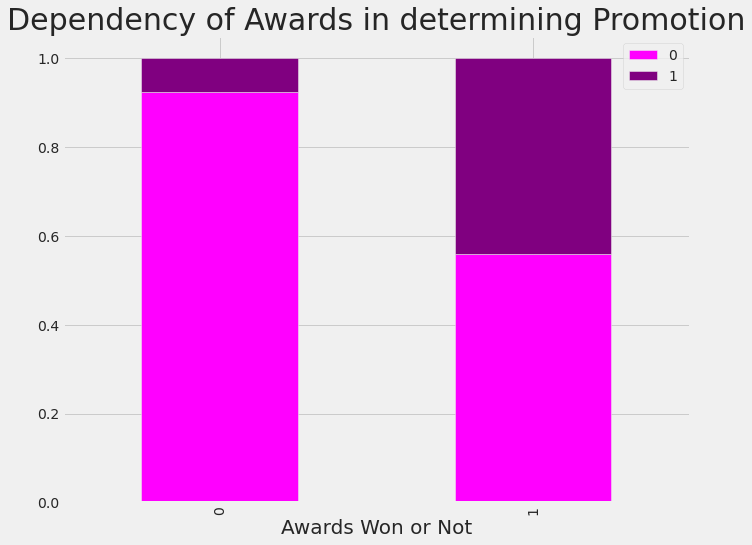

In [ ]:

# dependency of awards won on promotion

data = pd.crosstab(train['awards_won?'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['magenta', 'purple'])

plt.title('Dependency of Awards in determining Promotion', fontsize = 30)
plt.xlabel('Awards Won or Not', fontsize = 20)
plt.legend()
plt.show()

##### There is a very good chance of getting promoted if the employee has won an award

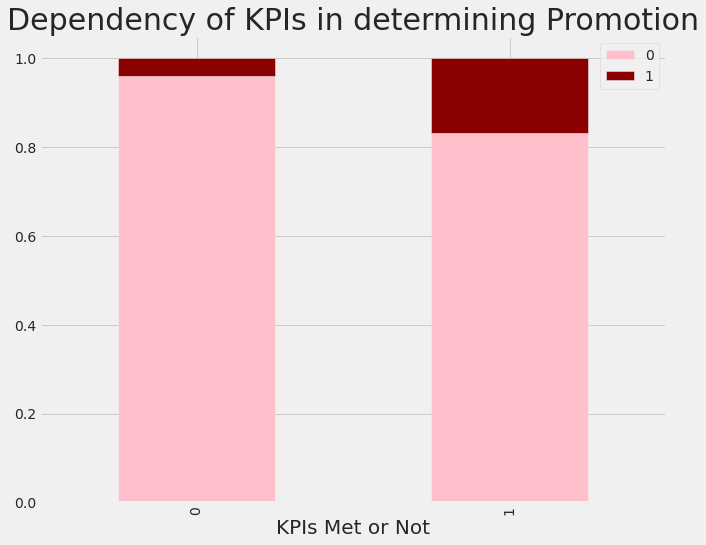

In [ ]:
#dependency of KPIs with Promotion

data = pd.crosstab(train['KPIs_met >80%'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 8), color = ['pink', 'darkred'])

plt.title('Dependency of KPIs in determining Promotion', fontsize = 30)
plt.xlabel('KPIs Met or Not', fontsize = 20)
plt.legend()
plt.show()

#### Again Having a good KPI score increases the chances of getting promoted in the company.

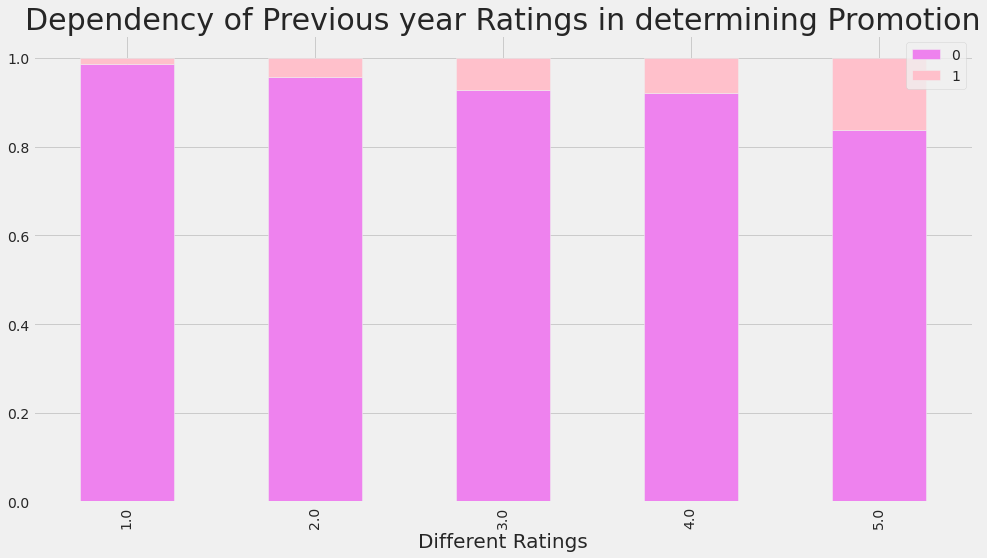

In [ ]:
# checking dependency on previous years' ratings

data = pd.crosstab(train['previous_year_rating'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['violet', 'pink'])

plt.title('Dependency of Previous year Ratings in determining Promotion', fontsize = 30)
plt.xlabel('Different Ratings', fontsize = 20)
plt.legend()
plt.show()

#### The Above Graph clearly suggests that previous ratings matter a lot, if the ratings are high, the chances of being promoted in the company increases and there is completely no promotion for the employees with previous year ratings = 0

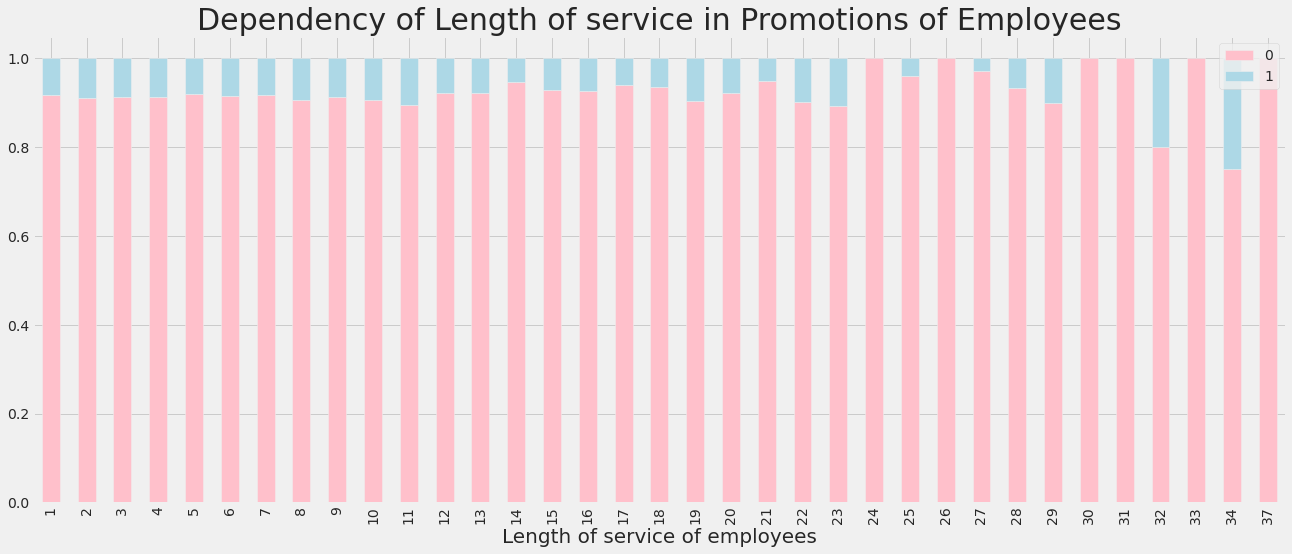

In [ ]:
# checking how length of service determines the promotion of employees

data = pd.crosstab(train['length_of_service'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['pink', 'lightblue'])

plt.title('Dependency of Length of service in Promotions of Employees', fontsize = 30)
plt.xlabel('Length of service of employees', fontsize = 20)
plt.legend()
plt.show()

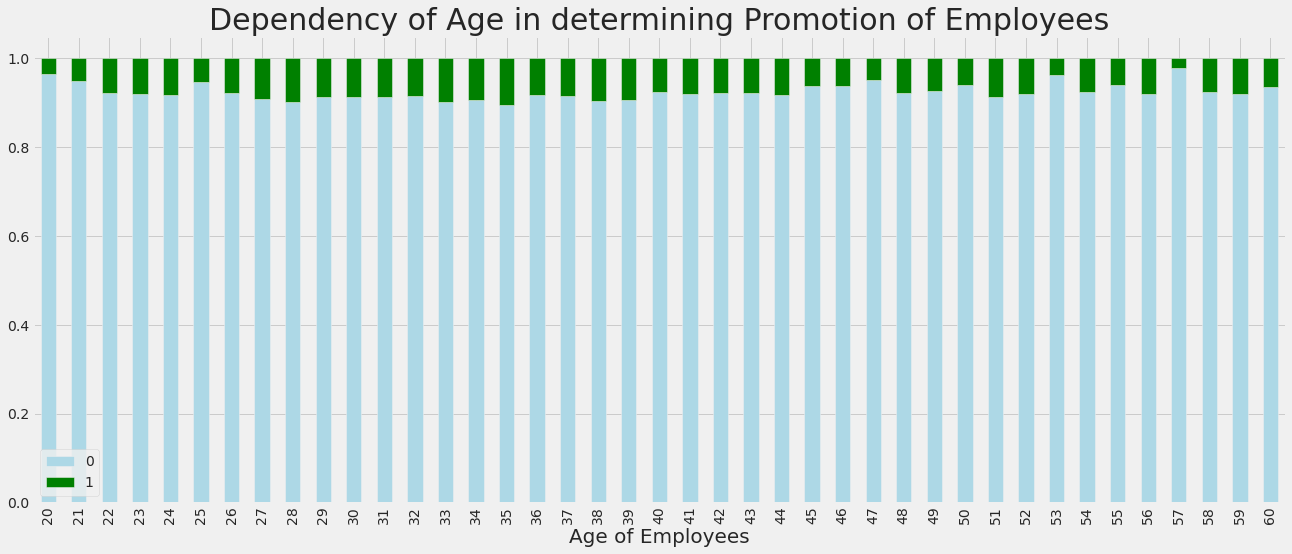

In [ ]:
# checking dependency of age factor in promotion of employees

data = pd.crosstab(train['age'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

#### This is Very Impressive that the company promotes employees of all the ages equally even the freshers have equal share of promotion and also the senior citizen employees are getting the equal share of Promotion in the Company

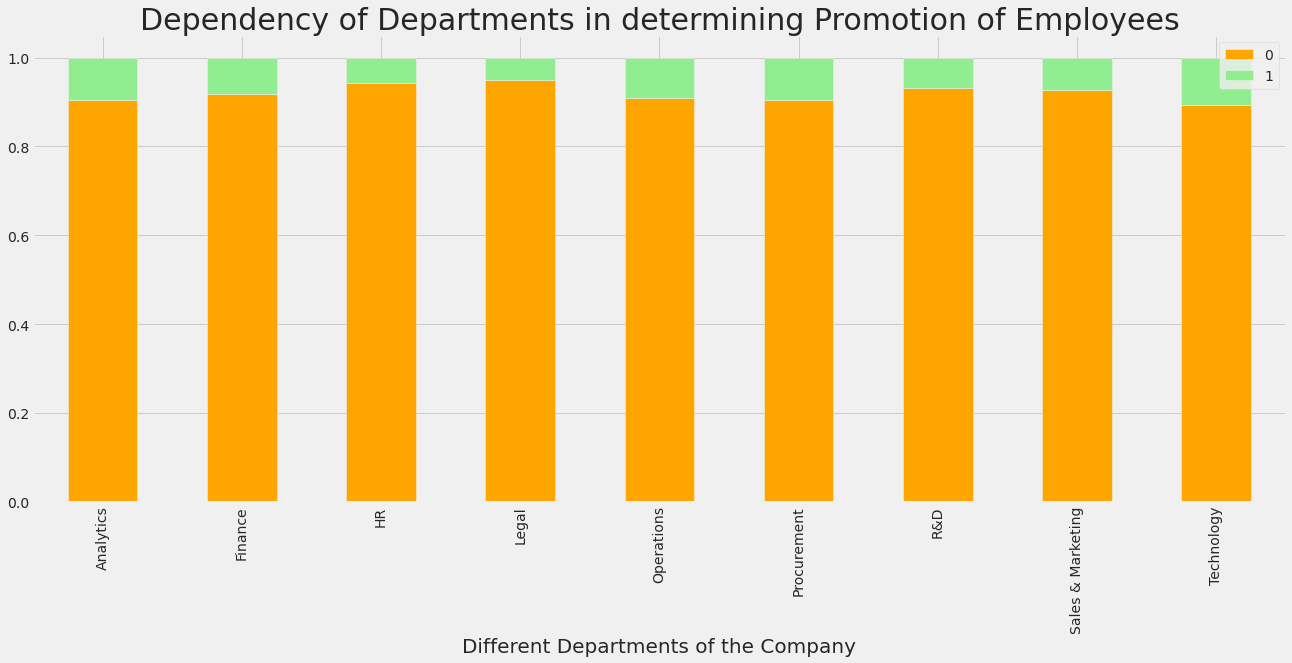

In [ ]:
# checking which department got most number of promotions

data = pd.crosstab(train['department'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['orange', 'lightgreen'])

plt.title('Dependency of Departments in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Different Departments of the Company', fontsize = 20)
plt.legend()
plt.show()

#### Again, Each of the departments have equal no. of promotions showing an equal developement in each of the departments of the company.

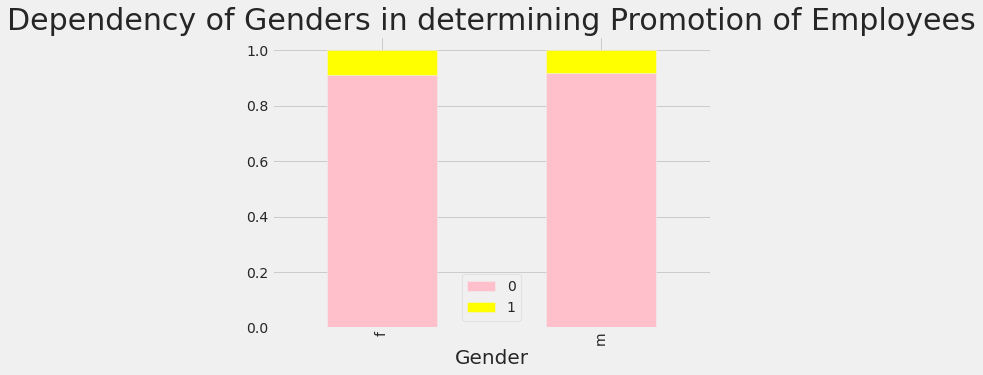

In [ ]:
# checking dependency of gender over promotion

data = pd.crosstab(train['gender'], train['is_promoted'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (7, 5), color = ['pink', 'yellow'])

plt.title('Dependency of Genders in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()

#### The above plot shows that there is no partiality between males and females in terms of promotion

## <font color='purple'>Data Pre-processing</font>

In [ ]:
# filling missing values

train['education'].fillna(train['education'].mode()[0], inplace = True)
train['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
train.isnull().sum().sum()

0

In [ ]:
# filling missing values

test['education'].fillna(test['education'].mode()[0], inplace = True)
test['previous_year_rating'].fillna(1, inplace = True)

# again checking if there is any Null value left in the data
test.isnull().sum().sum()

0

In [ ]:
# removing the employee_id column

train = train.drop(['employee_id'], axis = 1)

train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
# saving the employee_id

emp_id = test['employee_id']

# removing the employee_id column

test = test.drop(['employee_id'], axis = 1)

test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
# defining the test set

x_test = test

x_test.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
# one hot encoding for the test set

x_test = pd.get_dummies(x_test)

x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [ ]:
# splitting the train set into dependent and independent sets

x = train.iloc[:, :-1]
y = train.iloc[:, -1]

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (54808, 12)
Shape of y: (54808,)


In [ ]:
# one hot encoding for the train set

x = pd.get_dummies(x)

x.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

# <font color='purple'> Model Building </font>

In [ ]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (100280, 58)
Size of y-sample : (100280, 1)


In [ ]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 0)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (80224, 58)
Shape of x_valid:  (20056, 58)
Shape of y_train:  (80224, 1)
Shape of y_valid:  (20056, 1)


In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)
x_valid = sc.transform(x_valid)

## <font color='purple'> Random Forest Classifier</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print("Training Accuracy :", rfc.score(x_train, y_train))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.9998254886318308


## <font color='purple'> XGBoost CLassifier </font>

In [ ]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)

print("Training Accuracy :", xgb.score(x_train, y_train))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Accuracy : 0.9644869365775828


## <font color='purple'> Light Gradient Boosting Classifier</font>

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

lgb_pred = lgb.predict(x_test)

print("Training Accuracy :", lgb.score(x_train, y_train))

Training Accuracy : 0.9602986637415237


## <font color='purple'> Extra Trees Classifier</font>



In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train, y_train)

etc_pred = etc.predict(x_test)

print("Training Accuracy :", etc.score(x_train, y_train))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.9998254886318308
